# Visualization of inversion - Kimberlite data

In [142]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [143]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [144]:
mypath = 'data/flightlines_grid_2100pts_100k/tfa_inversion/inc-50_dec9_r500_int9_z00_dz500/'

In [145]:
with open(mypath+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [146]:
with open('data/model.pickle') as w:
        model = pickle.load(w)

In [147]:
inversion['estimate'][-1]*len(inversion['prisms'])

1970.0041533089227

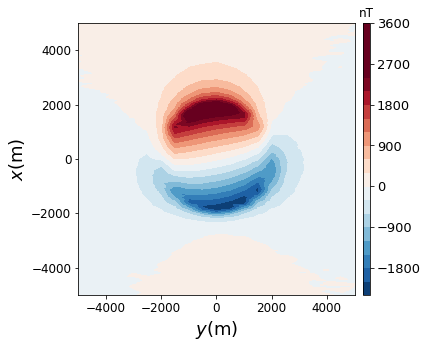

In [148]:
plt.figure(figsize=(6,5))
#plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
#plt.plot(inversion['y'], inversion['x'], 'ko', markersize=1.)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#clines = plt.tricontour(inversion['y'], inversion['x'], inversion['observed_data'], 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
#mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'kimberlite_real_data.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_real_data.png', width=1000, height=1200)

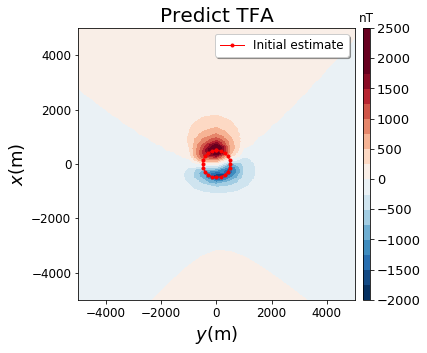

In [149]:
plt.figure(figsize=(6,5))
plt.title('Predict TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['initial_data']), vmax=np.min(inversion['initial_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['initial_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(inversion['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
#mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_pred_data_true_inital.png', dpi=300, bbox_inches="tight")
#plt.show()

#img(filename=mypath+'kimberlite_tfa_pred_data_true_inital.png', width=1000, height=1200)

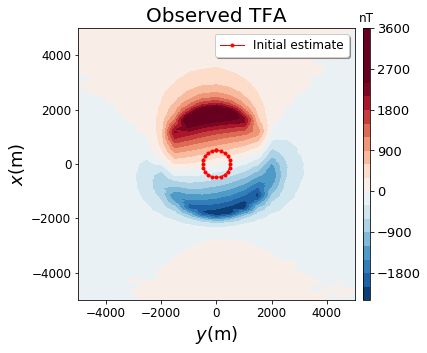

In [150]:
plt.figure(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(inversion['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
#mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_obs_data_true_inital.png', dpi=300, bbox_inches="tight")
#plt.show()

#img(filename=mypath+'kimberlite_tfa_obs_data_true_inital.png', width=1000, height=1200)

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


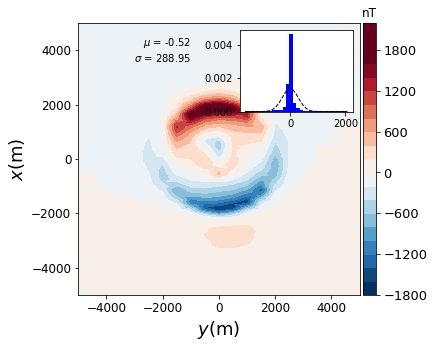

In [151]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'] - inversion['data_fit'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

In [152]:
inversion['observed_data'].shape

(2100,)

In [153]:
inversion['data_fit'].shape

(2100,)

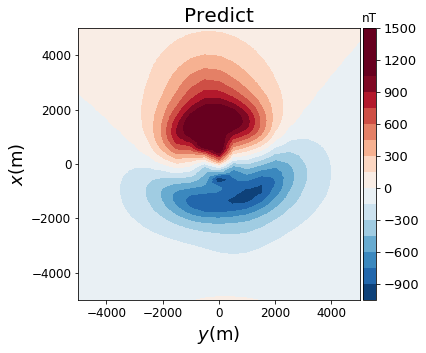

In [154]:
plt.figure(figsize=(6,5))
plt.title('Predict', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['data_fit']), vmax=np.min(inversion['data_fit'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['data_fit'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_predict.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_predict.png', width=1600, height=400)

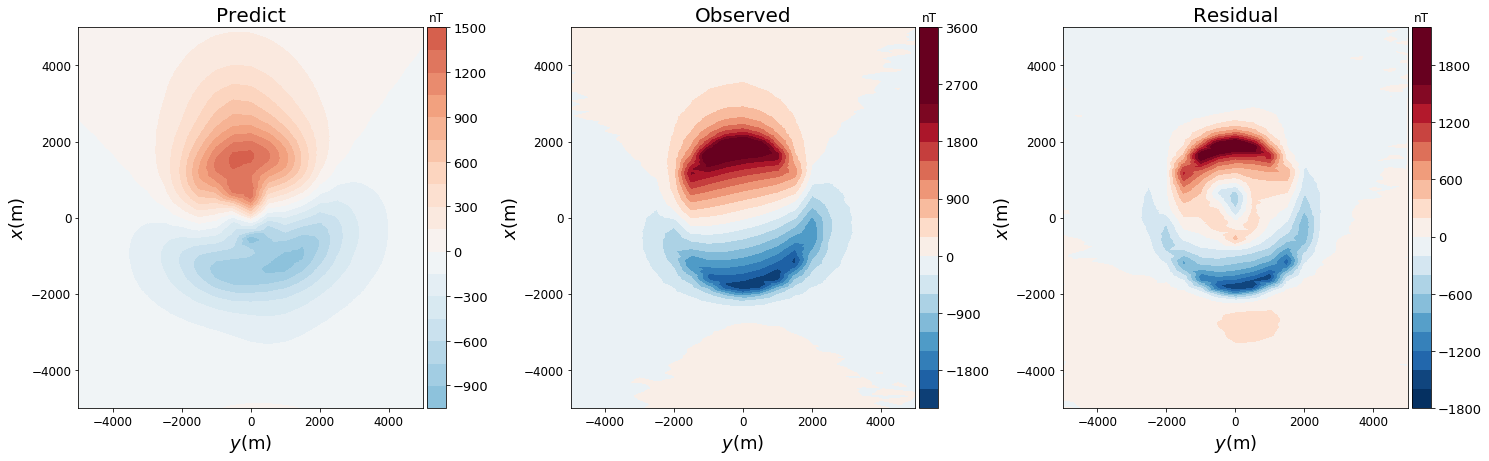

In [155]:
# plot
norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))

plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
plt.tricontourf(inversion['y'], inversion['x'], inversion['data_fit'],20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_fit.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_fit.png', width=1600, height=400)

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


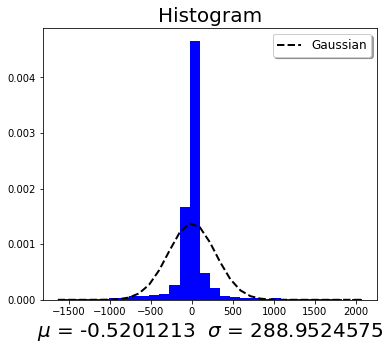

In [156]:
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
#nbins = int((np.max(inversion['residual_norm']) - np.min(inversion['residual_norm'])))
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
#plt.ylim(0.,0.5)
#plt.xlim(-10., 10.)
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_hist.png', dpi=300, bbox_inches="tight")
#plt.show()

#img(filename=mypath+'kimberlite_tfa_hist.png', width=400, height=400)

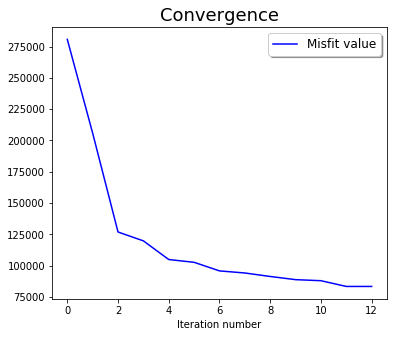

In [157]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(inversion['objective'], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig(mypath+'kimberlite_tfa_convergence.png', dpi=300, bbox_inches="tight")
#plt.show()

#img(filename=mypath+'kimberlite_tfa_convergence.png', width=400, height=400)

In [158]:
verts = mfun.plot_prisms(inversion['prisms'])
verts_true = mfun.plot_prisms(model['prisms'])
verts_initial = mfun.plot_prisms(inversion['initial_estimate'])

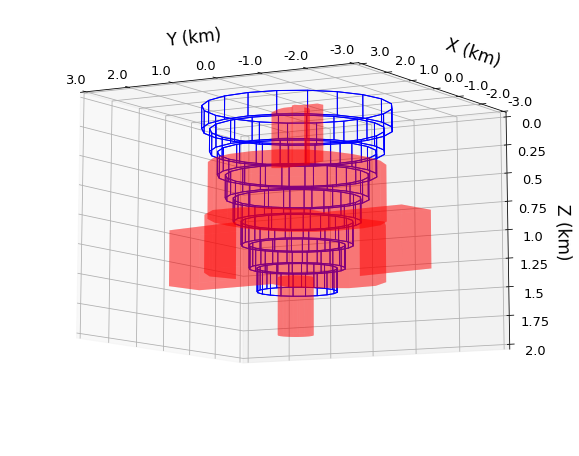

In [159]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-1150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_3d_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_3d_estimate.png', width=400, height=400)

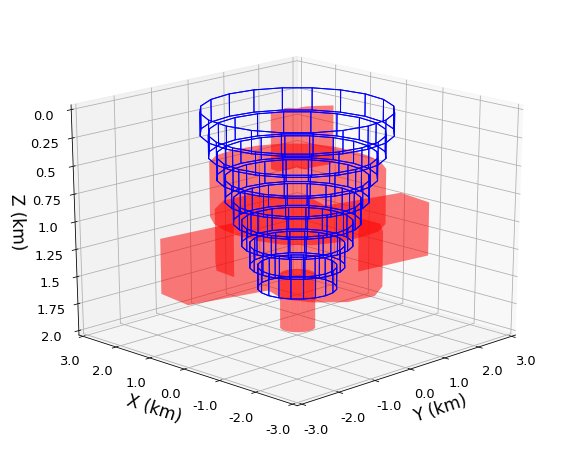

In [160]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-1150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_3d_estimate2.png', dpi=300, bbox_inches="tight")
plt.show()

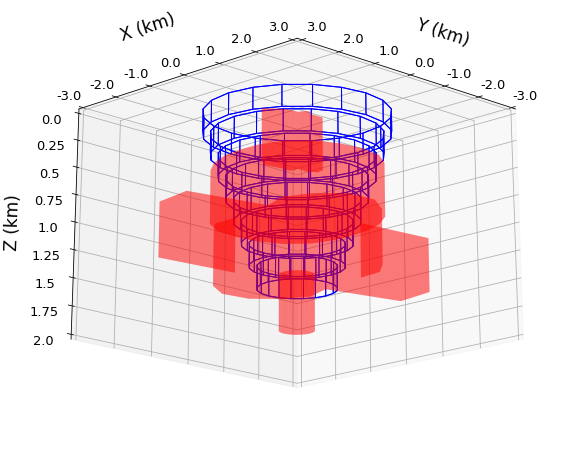

In [161]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=20
ax.zaxis.labelpad=15
ax.xaxis.labelpad=15

ax.view_init(-20, 45)
ax.autoscale_view()

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-1150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_3d_estimate3.png', dpi=300, bbox_inches="tight")
plt.show()

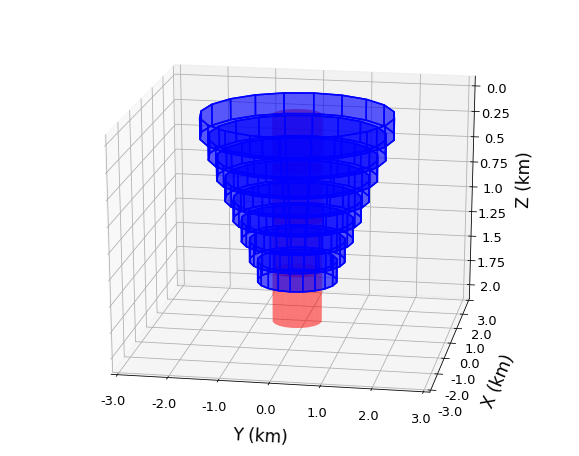

In [162]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.4, facecolor='b', linewidths=1.5, edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(inversion['initial_estimate'][-1].z2+100, -50, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
ax.xaxis.labelpad=20

ax.view_init(20, -80)

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'kimberlite_3d_ini_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'kimberlite_3d_estimate.png', width=400, height=400)

In [163]:
# calculate the momentum

volume_true = 0.
momentum_true = 0.
for bolacha in model['prisms']:
    area_true = mfun.area_polygon(bolacha.x, bolacha.y)
    volume_true += area_true*(bolacha.z2 - bolacha.z1)
    momentum_true += volume_true*model['intensity']
    
print volume_true/10.**9.    
print momentum_true/10.**9.

9.809435469438327
498.952188651947


In [164]:
volume = 0.
momentum = 0.
for bolacha in inversion['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*np.linalg.norm(bolacha.props['magnetization'])
    
print volume/10.**9.
print momentum/10.**9.

11.1319399659611
243.77720474917413


In [165]:
(volume_true - volume)*100./volume_true

-13.481963367240503

In [166]:
((momentum_true - momentum)*100./momentum_true)

51.14217147582745

In [167]:
inversion['estimate'][-1]

492.5010383272307

In [168]:
np.std(inversion['residual'])/np.std(inversion['observed_data'])*100

49.815348064009335